# Hate Speech Data (Kaggle):

In [23]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [12]:
my_df = pd.read_csv('labeled_data.csv',index_col='INDEX')
my_df

,count,hate_speech,offensive_language,neither,class,tweet
INDEX,,,,,,
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...
25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...


In [65]:
print(my_df.shape)
print(my_df.size)
print(my_df.columns)

(24783, 6)
148698
Index(['count', 'hate_speech', 'offensive_language', 'neither', 'class',
       'tweet'],
      dtype='object')


In [17]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24783 entries, 0 to 25296
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   count               24783 non-null  int64 
 1   hate_speech         24783 non-null  int64 
 2   offensive_language  24783 non-null  int64 
 3   neither             24783 non-null  int64 
 4   class               24783 non-null  int64 
 5   tweet               24783 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.3+ MB


In [19]:
my_df.isnull().sum()

count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

<Axes: title={'center': 'Count Histogram'}, ylabel='Frequency'>

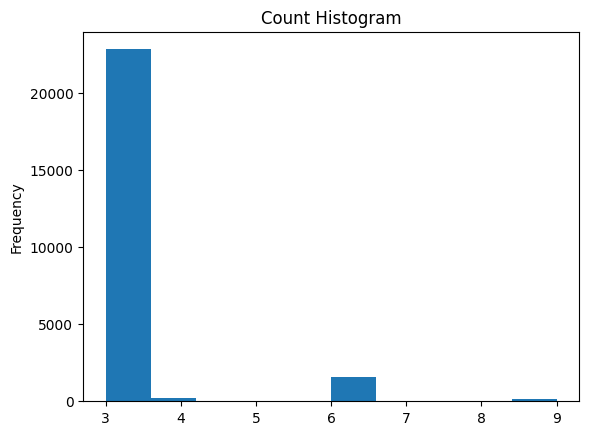

In [24]:
my_df['count'].plot.hist(title='Count Histogram')

In [25]:
my_df['count'].value_counts()

count
3    22807
6     1571
4      211
9      167
7       27
Name: count, dtype: int64

<Axes: title={'center': 'Class Histogram'}, ylabel='Frequency'>

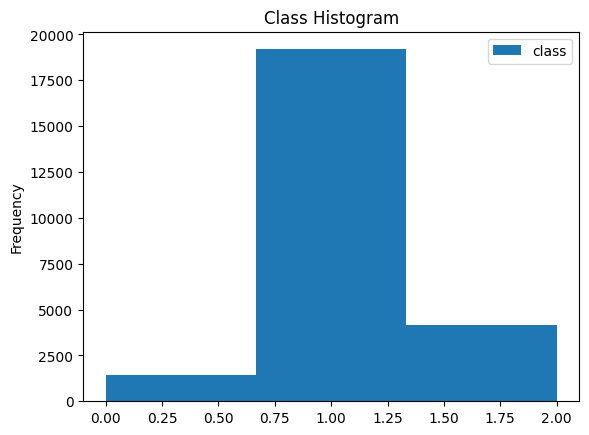

In [61]:
my_df['class'].plot.hist(title='Class Histogram',bins=3,legend=True)

In [22]:
my_df['class'].value_counts()

class
1    19190
2     4163
0     1430
Name: count, dtype: int64

<Axes: title={'center': 'Class Vs Count'}, xlabel='count', ylabel='class'>

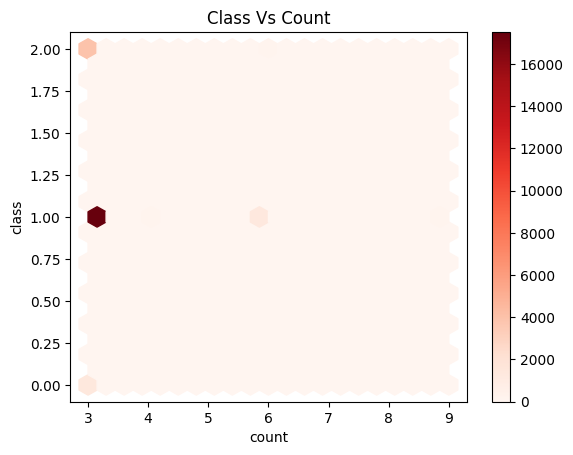

In [49]:
my_df.plot.hexbin(title='Class Vs Count',y='class',gridsize=20,x='count',colormap='Reds')

<Axes: title={'center': 'Hate Speech Histogram'}, ylabel='Frequency'>

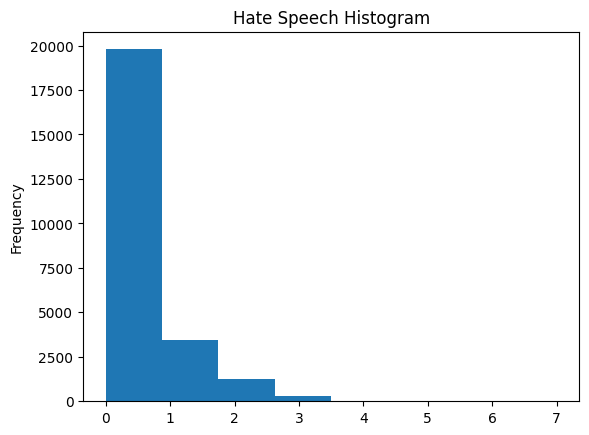

In [53]:
my_df['hate_speech'].plot.hist(bins=8,title='Hate Speech Histogram')

In [51]:
my_df['hate_speech'].value_counts()

hate_speech
0    19790
1     3419
2     1251
3      287
4       21
5        7
6        5
7        3
Name: count, dtype: int64

<Axes: title={'center': 'Offensive Language Histogram'}, ylabel='Frequency'>

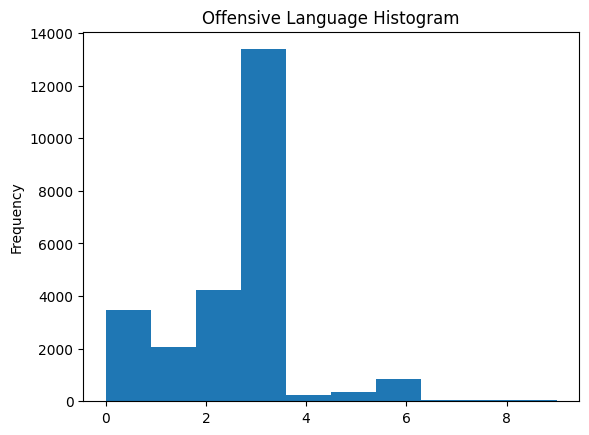

In [56]:
my_df['offensive_language'].plot.hist(title='Offensive Language Histogram')

In [57]:
my_df['offensive_language'].value_counts()

offensive_language
3    13383
2     4246
0     3475
1     2066
6      857
5      369
4      251
9       66
8       37
7       33
Name: count, dtype: int64

<Axes: title={'center': 'Neither Histogram'}, ylabel='Frequency'>

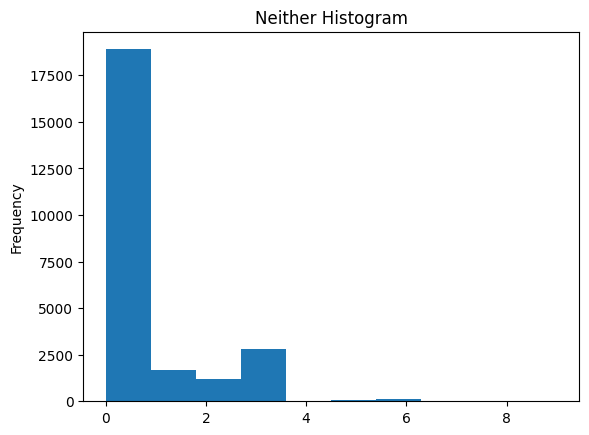

In [58]:
my_df['neither'].plot.hist(title='Neither Histogram')

In [62]:
my_df['neither'].value_counts()

neither
0    18892
3     2790
1     1694
2     1200
6      103
5       54
4       35
9        5
8        5
7        5
Name: count, dtype: int64

In [63]:
my_df['neither'].unique()

array([3, 0, 1, 2, 6, 4, 5, 9, 8, 7])

In [69]:
group = my_df.drop('tweet',axis=1).groupby('class')
group

In [70]:
group.sum()

,count,hate_speech,offensive_language,neither
class,,,,
0,4445,3227,1081,137
1,62730,3463,57638,1629
2,13208,262,1100,11846


In [72]:
class_0 = my_df[my_df['class']==0]
class_0

,count,hate_speech,offensive_language,neither,class,tweet
INDEX,,,,,,
85,3,2,1,0,0,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1..."
90,3,3,0,0,0,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ..."
111,3,3,0,0,0,"""@DevilGrimz: @VigxRArts you're fucking gay, b..."
186,3,3,0,0,0,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL..."
204,3,2,1,0,0,"""@NoChillPaz: ""At least I'm not a nigger"" http..."
...,...,...,...,...,...,...
25084,3,2,1,0,0,this guy is the biggest faggot omfg
25197,3,2,1,0,0,which one of these names is more offensive kik...
25264,3,2,1,0,0,you a pussy ass nigga and I know it nigga.
